 #  A Whale off the Port(folio)

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500.

In [103]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:
1. whale_returns.csv
2. algo_returns.csv
3. sp500_history.csv

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [104]:
# Reading whale returns
whale_returns_csv = Path("Resources/whale_returns.csv")
# YOUR CODE HERE
whale_returns_df = pd.read_csv(whale_returns_csv,index_col='Date',parse_dates=True, infer_datetime_format=True)
whale_returns_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [105]:
# Count nulls
# YOUR CODE HERE
whale_returns_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [106]:
# Drop nulls
# YOUR CODE HERE
whale_returns_df.dropna(inplace=True)
whale_returns_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [107]:
# Reading algorithmic returns
algo_returns_csv = Path("Resources/algo_returns.csv")
# YOUR CODE HERE
algo_returns_df = pd.read_csv(algo_returns_csv,index_col='Date',parse_dates=True, infer_datetime_format=True)
algo_returns_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [108]:
# Count nulls
# YOUR CODE HERE
algo_returns_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [109]:
# Drop nulls
# YOUR CODE HERE
algo_returns_df.dropna(inplace=True)
algo_returns_df.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P500 Historic Closing Prices and create a new daily returns DataFrame from the data. 

In [110]:
# Reading S&P 500 Closing Prices
sp500_history_csv = Path("Resources/sp500_history.csv")
# YOUR CODE HERE
sp500_history_df = pd.read_csv(sp500_history_csv,index_col='Date',parse_dates=True, infer_datetime_format=True)
sp500_history_df.head()

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [111]:
# Check Data Types
# YOUR CODE HERE
sp500_history_df.dtypes

Close    object
dtype: object

In [112]:
# Fix Data Types
# YOUR CODE HERE
sp500_history_df['Close']=sp500_history_df['Close'].str.replace('$','')
sp500_history_df['Close']=sp500_history_df['Close'].astype('float')
sp500_history_df['Close']

Date
2019-04-23    2933.68
2019-04-22    2907.97
2019-04-18    2905.03
2019-04-17    2900.45
2019-04-16    2907.06
               ...   
2012-10-05    1460.93
2012-10-04    1461.40
2012-10-03    1450.99
2012-10-02    1445.75
2012-10-01    1444.49
Name: Close, Length: 1649, dtype: float64

In [113]:
# Calculate Daily Returns
# YOUR CODE HERE
sp500_returns_df = sp500_history_df.pct_change()
sp500_returns_df.head()

,Close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279


In [114]:
# Drop nulls
# YOUR CODE HERE
sp500_returns_df.dropna(inplace=True)
sp500_returns_df.isnull().sum()

Close    0
dtype: int64

In [115]:
# Rename Column
# YOUR CODE HERE
sp500_returns_df = sp500_returns_df.rename(columns={"Close": "S&P 500"})
sp500_returns_df.head()

,S&P 500
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


## Combine Whale, Algorithmic, and S&P 500 Returns

In [116]:
# Concatenate all DataFrames into a single DataFrame
# YOUR CODE HERE
combined_returns_df = pd.concat([whale_returns_df,algo_returns_df,sp500_returns_df],axis='columns',join='inner')
combined_returns_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254


---

# Portfolio Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance

Calculate and Plot the daily returns and cumulative returns. 

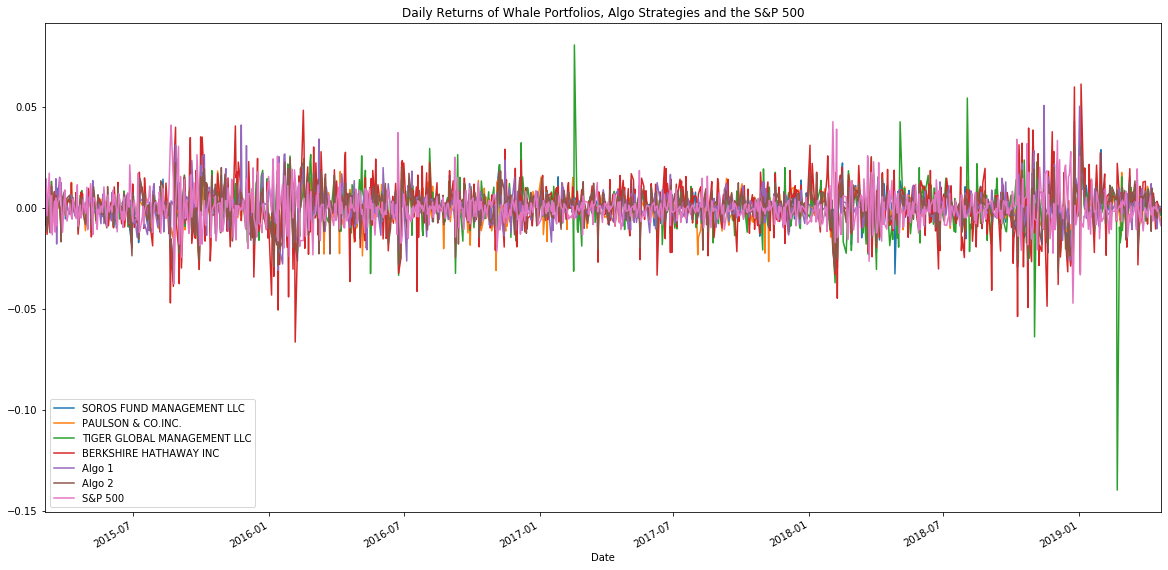

In [117]:
# Plot daily returns
# YOUR CODE HERE
combined_returns_df.plot(figsize=[20,10],title = 'Daily Returns of Whale Portfolios, Algo Strategies and the S&P 500')

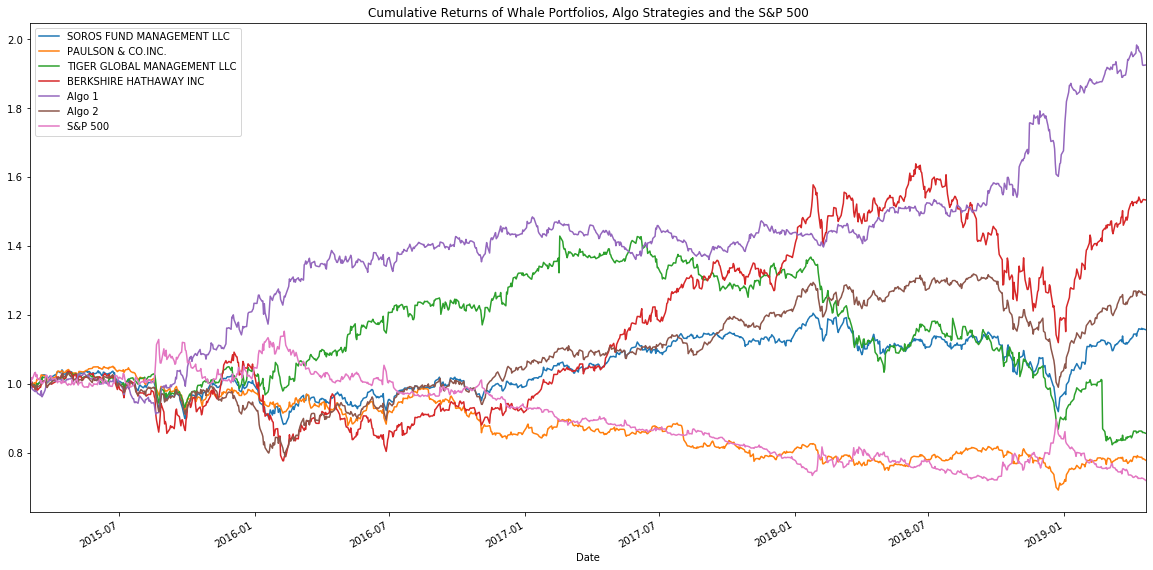

In [118]:
# Plot cumulative returns
# YOUR CODE HERE
cumulative_returns = (1 + combined_returns_df).cumprod()
cumulative_returns.plot(figsize=[20,10],title = 'Cumulative Returns of Whale Portfolios, Algo Strategies and the S&P 500')

#### ***Does any portfolio outperform the S&P500?***
The cumulative returns chart above suggest that all portfolios except Paulson & Co.Inc. outperform the S&P 500.**

---

## Risk

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

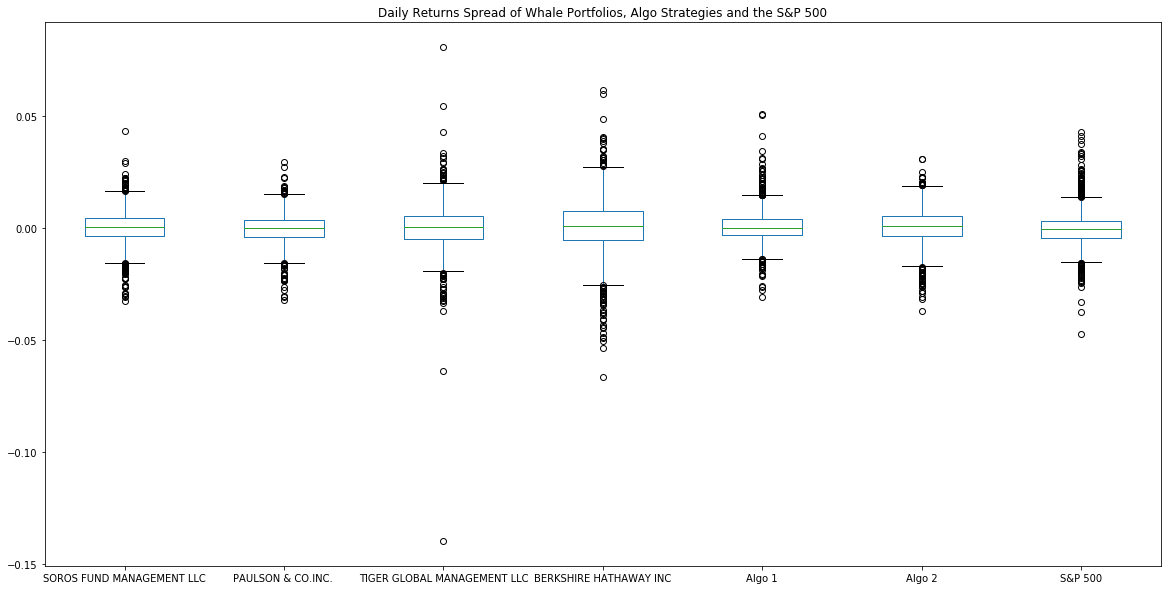

In [119]:
# Box plot to visually show risk
# YOUR CODE HERE
combined_returns_df.plot.box(figsize=[20,10], title = 'Daily Returns Spread of Whale Portfolios, Algo Strategies and the S&P 500')

#### ***Which box has the largest spread?***
Berkshire Hathaway Inc has the largest spread.
#### ***Which has the smallest spread?***
Paulson & Co.Inc has the smallest spread.

In [120]:
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio. Which portfolios are riskier than the S&P 500?
# YOUR CODE HERE
combined_returns_std = combined_returns_df.std()
combined_returns_std

SOROS FUND MANAGEMENT LLC      0.007896
PAULSON & CO.INC.              0.007026
TIGER GLOBAL MANAGEMENT LLC    0.010897
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007623
Algo 2                         0.008341
S&P 500                        0.008587
dtype: float64

In [121]:
# Determine which portfolios are riskier than the S&P 500
# YOUR CODE HERE
combined_returns_std > combined_returns_std['S&P 500']

SOROS FUND MANAGEMENT LLC      False
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
Algo 1                         False
Algo 2                         False
S&P 500                        False
dtype: bool

#### ***Which portfolios are riskier than the S&P 500?***
With standard deviations greater than S&P500 of 0.008584, Tiger Global Management LLC (with standard deviation of 0.010897) and Bershire Hathaway Inc (with standard deviation of 0.012919) are riskier than S&P500.

In [122]:
#Calculate the annualized standard deviation (252 trading days)
# YOUR CODE HERE
combined_returns_annual_std = combined_returns_std * np.sqrt(252)
combined_returns_annual_std

SOROS FUND MANAGEMENT LLC      0.125348
PAULSON & CO.INC.              0.111527
TIGER GLOBAL MANAGEMENT LLC    0.172989
BERKSHIRE HATHAWAY INC         0.205079
Algo 1                         0.121006
Algo 2                         0.132413
S&P 500                        0.136313
dtype: float64

In [123]:
combined_returns_annual_std > combined_returns_annual_std['S&P 500']

SOROS FUND MANAGEMENT LLC      False
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
Algo 1                         False
Algo 2                         False
S&P 500                        False
dtype: bool

#### ***Which portfolios are riskier than the S&P 500?***
Looking at annualized terms further validates the earlier analysis. Tiger Global Management LLC (with annualized standard deviation of  0.172989) and Bershire Hathaway Inc (with annualized standard deviation of 0.136268) are riskier than S&P500 (with annualized standard deviation of 0.136268).

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&PP 500 using a 21 day window
2. Calcualte the correlation between each stock to determine which portfolios may mimick the S&P 500
2. Calculate and plot a 60 day Beta for Berkshire Hathaway Inc compared to the S&&P 500

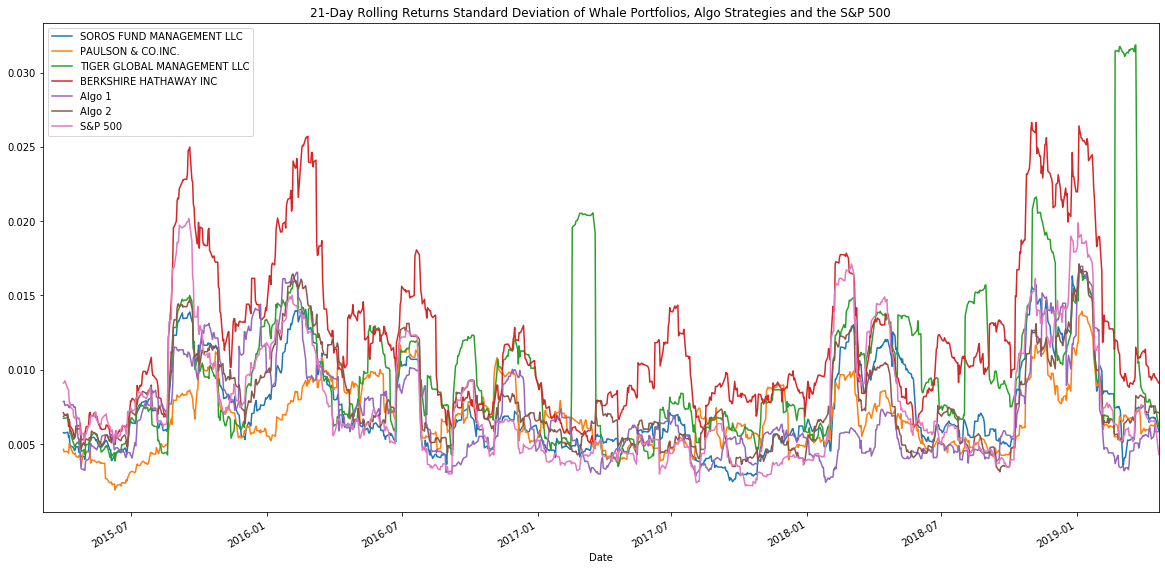

In [124]:
# Calculate and plot the rolling standard deviation for the S&PP 500 using a 21 day window
# YOUR CODE HERE
combined_returns_df.rolling(window=21).std().plot(figsize=[20,10],title = '21-Day Rolling Returns Standard Deviation of Whale Portfolios, Algo Strategies and the S&P 500')

#### ***Does risk increase for each of the portfolios at the same time risk increases in the S&P?***
The chart above suggests each portfolio's risk generally increase at the same time risk increases in the S&P500. This is further validated by the positive correlation of each portfolio's 21-day rolling standard deviation to S&P500's as shown in the correlation matrix below.

In [125]:
combined_returns_df.rolling(window=21).std().corr()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
SOROS FUND MANAGEMENT LLC,1.000000,0.664526,0.451455,0.859050,0.721419,0.872868,0.895536
PAULSON & CO.INC.,0.664526,1.000000,0.407718,0.631143,0.585529,0.688516,0.581447
TIGER GLOBAL MANAGEMENT LLC,0.451455,0.407718,1.000000,0.412728,0.265495,0.359271,0.407194
BERKSHIRE HATHAWAY INC,0.859050,0.631143,0.412728,1.000000,0.794150,0.824796,0.799674
Algo 1,0.721419,0.585529,0.265495,0.794150,1.000000,0.760948,0.684632
Algo 2,0.872868,0.688516,0.359271,0.824796,0.760948,1.000000,0.890712
S&P 500,0.895536,0.581447,0.407194,0.799674,0.684632,0.890712,1.000000


In [126]:
# Correlation
# YOUR CODE HERE
combined_returns_df.corr()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
SOROS FUND MANAGEMENT LLC,1.000000,0.699823,0.561040,0.754157,0.320901,0.826730,0.000574
PAULSON & CO.INC.,0.699823,1.000000,0.434308,0.545451,0.268631,0.678085,0.013549
TIGER GLOBAL MANAGEMENT LLC,0.561040,0.434308,1.000000,0.424125,0.164114,0.507160,-0.001505
BERKSHIRE HATHAWAY INC,0.754157,0.545451,0.424125,1.000000,0.291678,0.687756,-0.013856
Algo 1,0.320901,0.268631,0.164114,0.291678,1.000000,0.287852,-0.033963
Algo 2,0.826730,0.678085,0.507160,0.687756,0.287852,1.000000,-0.002192
S&P 500,0.000574,0.013549,-0.001505,-0.013856,-0.033963,-0.002192,1.000000


#### ***Which returns most closely mimic the S&P?***
Paulson & Co.Inc. with a positive correlation of 0.013549 with S&P500 closely mimics S&P500's returns, further validated by the cumulative returns chart above. 

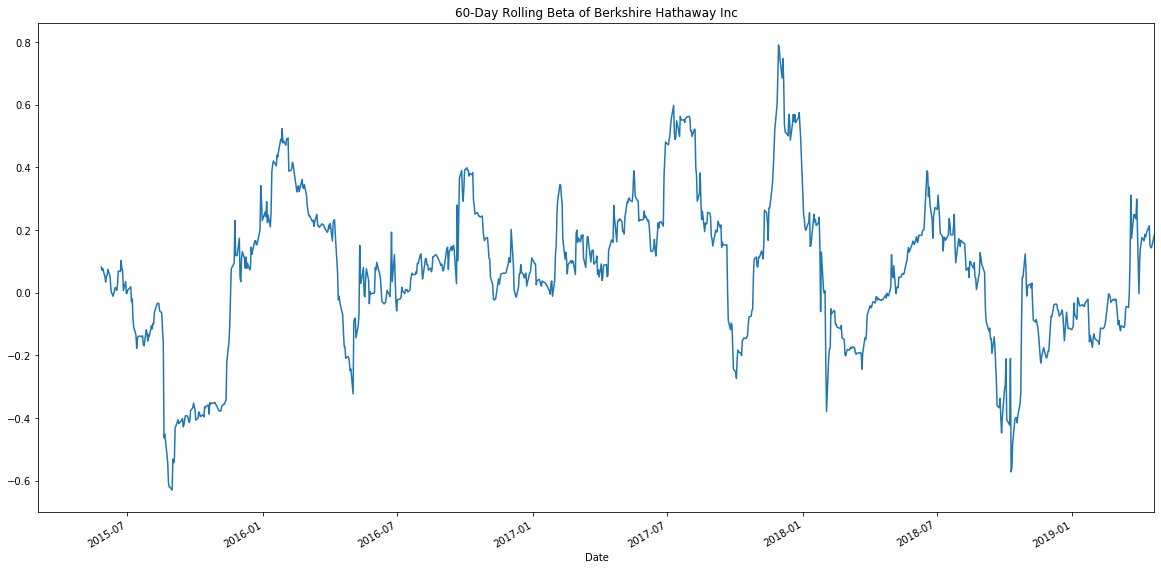

In [127]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
# YOUR CODE HERE
rolling_covariance = combined_returns_df['BERKSHIRE HATHAWAY INC'].rolling(window=60).cov(combined_returns_df['S&P 500'])
rolling_variance = combined_returns_df['S&P 500'].rolling(window=60).var()
rolling_beta = rolling_covariance/rolling_variance
rolling_beta.plot(figsize = [20,10],title = '60-Day Rolling Beta of Berkshire Hathaway Inc')

#### ***Does the portfolio seem sensitive to movements in the S&P 500?***
Although some negativeb troughs existy, the chart above does suggest Berkshire traded with the market with beta genralliy hovering in the 0.0-1.0 range, suggesting correlation with the market.

### Challenge: Exponentially Weighted Average 

An alternative way to calculate a rollwing window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the `ewm` with a 21 day half-life.

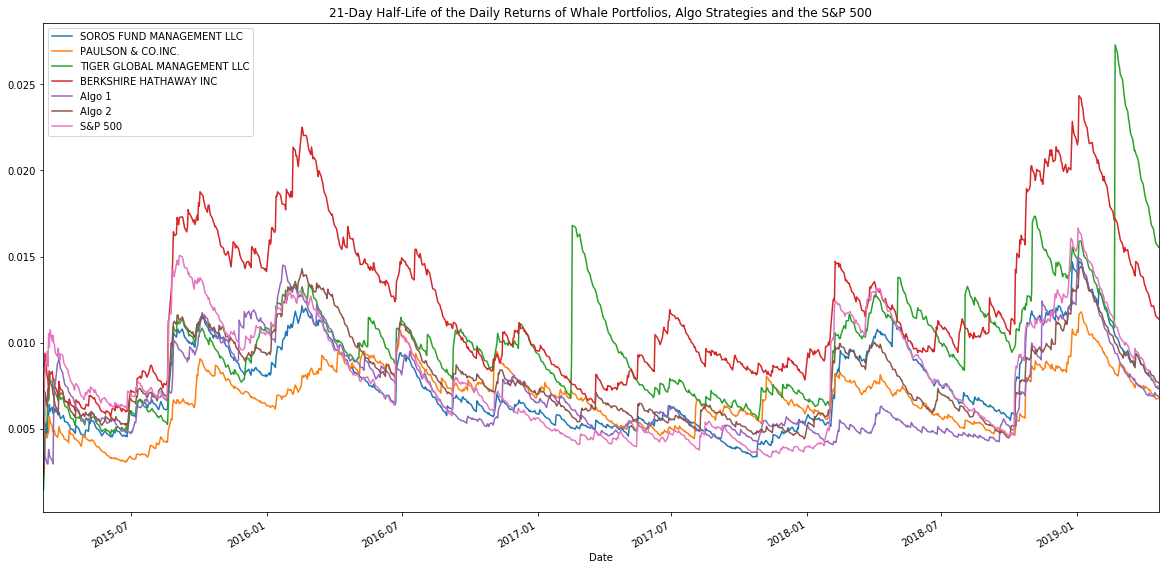

In [128]:
combined_returns_df.ewm(halflife=21).std().plot(figsize=[20,10], title = '21-Day Half-Life of the Daily Returns of Whale Portfolios, Algo Strategies and the S&P 500')

---

## Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)

Calculate and plot the annualized Sharpe ratios for all portfolios to determine which portfolio has the best performance

In [129]:
# Annualzied Sharpe Ratios
# YOUR CODE HERE
sharpe_ratios = (combined_returns_df.mean() * 252) / (combined_returns_df.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.342894
PAULSON & CO.INC.             -0.491422
TIGER GLOBAL MANAGEMENT LLC   -0.130186
BERKSHIRE HATHAWAY INC         0.606743
Algo 1                         1.369589
Algo 2                         0.484334
S&P 500                       -0.518582
dtype: float64

 plot() these sharpe ratios using a barplot.
 On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales?

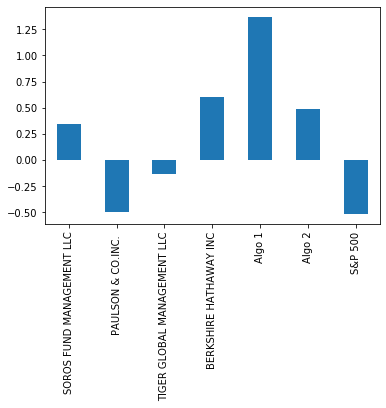

In [130]:
# Visualize the sharpe ratios as a bar plot
# YOUR CODE HERE
sharpe_ratios.plot(kind='bar')

#### ***Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.***
Both algorothmic strategies outperform S&P 500. Algo 1 outperforms all whales portfolios, while Algo 2 outperforms all except Berkshire Hathaway Inc.

---

# Portfolio Returns

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [131]:
# Read the first stock
# YOUR CODE HERE
amazon_csv = Path("Resources/AMZNHistorical NOCP 1y.csv")
amazon_data = pd.read_csv(amazon_csv,index_col='Trade DATE',parse_dates=True, infer_datetime_format=True)
amazon_data.head()

,Symbol,NOCP
Trade DATE,,
2019-09-12,AMZN,1843.55
2019-09-11,AMZN,1822.99
2019-09-10,AMZN,1820.55
2019-09-09,AMZN,1831.35
2019-09-06,AMZN,1833.51


In [132]:
# Read the second stock
# YOUR CODE HERE
intuit_csv = Path("Resources/INTUHistorical NOCP 1y.csv")
intuit_data = pd.read_csv(intuit_csv,index_col='Trade DATE',parse_dates=True, infer_datetime_format=True)
intuit_data.head()

,Symbol,NOCP
Trade DATE,,
2019-09-12,INTU,268.25
2019-09-11,INTU,266.13
2019-09-10,INTU,267.56
2019-09-09,INTU,275.90
2019-09-06,INTU,287.80


In [133]:
# Read the third stock
# YOUR CODE HERE
qualcom_csv = Path("Resources/QCOMHistorical NOCP 1y.csv")
qualcom_data = pd.read_csv(qualcom_csv,index_col='Trade DATE',parse_dates=True, infer_datetime_format=True)
qualcom_data.head()

,Symbol,NOCP
Trade DATE,,
2019-09-12,QCOM,79.08
2019-09-11,QCOM,79.90
2019-09-10,QCOM,78.71
2019-09-09,QCOM,78.21
2019-09-06,QCOM,78.84


In [134]:
# Concatenate all stocks into a single DataFrame
# YOUR CODE HERE
customportfolio_df = pd.concat([amazon_data,intuit_data,qualcom_data],axis='rows',join='inner')
customportfolio_df.head()

,Symbol,NOCP
Trade DATE,,
2019-09-12,AMZN,1843.55
2019-09-11,AMZN,1822.99
2019-09-10,AMZN,1820.55
2019-09-09,AMZN,1831.35
2019-09-06,AMZN,1833.51


In [135]:
# Reset the index
# YOUR CODE HERE
customportfolio_df = customportfolio_df.reset_index()
customportfolio_df.head()

,Trade DATE,Symbol,NOCP
0,2019-09-12,AMZN,1843.55
1,2019-09-11,AMZN,1822.99
2,2019-09-10,AMZN,1820.55
3,2019-09-09,AMZN,1831.35
4,2019-09-06,AMZN,1833.51


In [136]:
# Pivot the Data so that the stock tickers are the columns, the dates are the index, and the 
# values are the closing prices
# YOUR CODE HERE
customportfolio_df = customportfolio_df.pivot_table(values="NOCP", index="Trade DATE", columns="Symbol")
customportfolio_df.head()

Symbol,AMZN,INTU,QCOM
Trade DATE,,,
2018-09-17,1908.03,225.47,73.24
2018-09-18,1941.05,228.18,74.72
2018-09-19,1926.42,220.88,74.06
2018-09-20,1944.30,221.45,74.60
2018-09-21,1915.01,220.44,73.70


In [137]:
# Drop Nulls
# YOUR CODE HERE
customportfolio_returns = customportfolio_df.pct_change()
customportfolio_returns.dropna(inplace=True)
customportfolio_returns.isnull().sum()
customportfolio_returns.head()

Symbol,AMZN,INTU,QCOM
Trade DATE,,,
2018-09-18,0.017306,0.012019,0.020208
2018-09-19,-0.007537,-0.031992,-0.008833
2018-09-20,0.009281,0.002581,0.007291
2018-09-21,-0.015065,-0.004561,-0.012064
2018-09-24,0.010104,-0.006986,-0.001628


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [138]:
# Calculate weighted portfolio returns
weights = [1/3, 1/3, 1/3]
# YOUR CODE HERE
customportfolio_returns_weighted = customportfolio_returns.dot(weights)
customportfolio_returns_weighted.head()

Trade DATE
2018-09-18    0.016511
2018-09-19   -0.016121
2018-09-20    0.006384
2018-09-21   -0.010563
2018-09-24    0.000497
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [139]:
# YOUR CODE HERE
new_portfolio_df = pd.concat([combined_returns_df,customportfolio_returns_weighted],axis='columns',join='inner')
new_portfolio_df.rename(columns={0:'Custom'}, inplace=True)
new_portfolio_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Custom
2018-09-18,0.007136,0.004387,-0.010175,0.007881,0.001882,0.003475,-0.001252,0.016511
2018-09-19,0.002123,0.002673,-0.001223,0.005441,0.014688,-0.001396,-0.007780,-0.016121
2018-09-20,0.004427,0.006203,0.009847,0.011431,0.011699,0.007725,0.000369,0.006384
2018-09-21,-0.001724,-0.000370,-0.006489,-0.001485,-0.004860,-0.003114,0.003528,-0.010563
2018-09-24,-0.007073,-0.005287,-0.011071,-0.003209,0.012860,-0.003643,0.001307,0.000497


In [140]:
# Only compare dates where the new, custom portfolio has dates
# YOUR CODE HERE

***The table has an inner join, resulting in data showing dates common across all portfolios.***

## Re-run the performance and risk analysis with your portfolio to see how it compares to the others

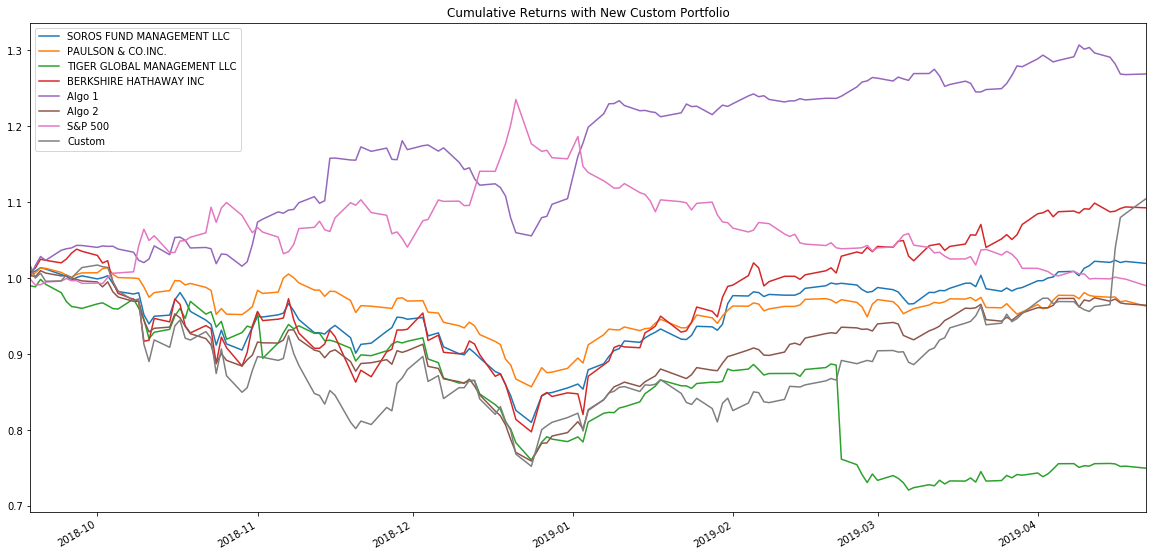

In [141]:
#Performance
cumulative_returns_newfolio = (1 + new_portfolio_df).cumprod()
cumulative_returns_newfolio.plot(figsize=[20,10],title = 'Cumulative Returns with New Custom Portfolio')

In [142]:
# Risk
# YOUR CODE HERE
new_portfolio_std = new_portfolio_df.std()
new_portfolio_std

SOROS FUND MANAGEMENT LLC      0.010833
PAULSON & CO.INC.              0.008553
TIGER GLOBAL MANAGEMENT LLC    0.016734
BERKSHIRE HATHAWAY INC         0.017757
Algo 1                         0.010073
Algo 2                         0.010346
S&P 500                        0.011464
Custom                         0.019528
dtype: float64

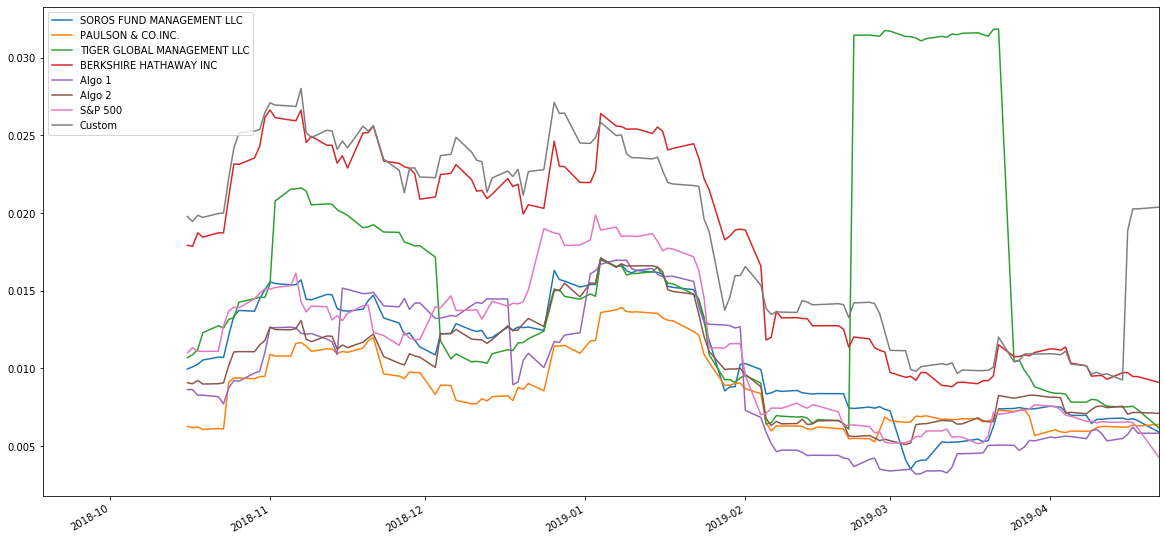

In [143]:
# Rolling
# YOUR CODE HERE
new_portfolio_df.rolling(window=21).std().plot(figsize=[20,10])

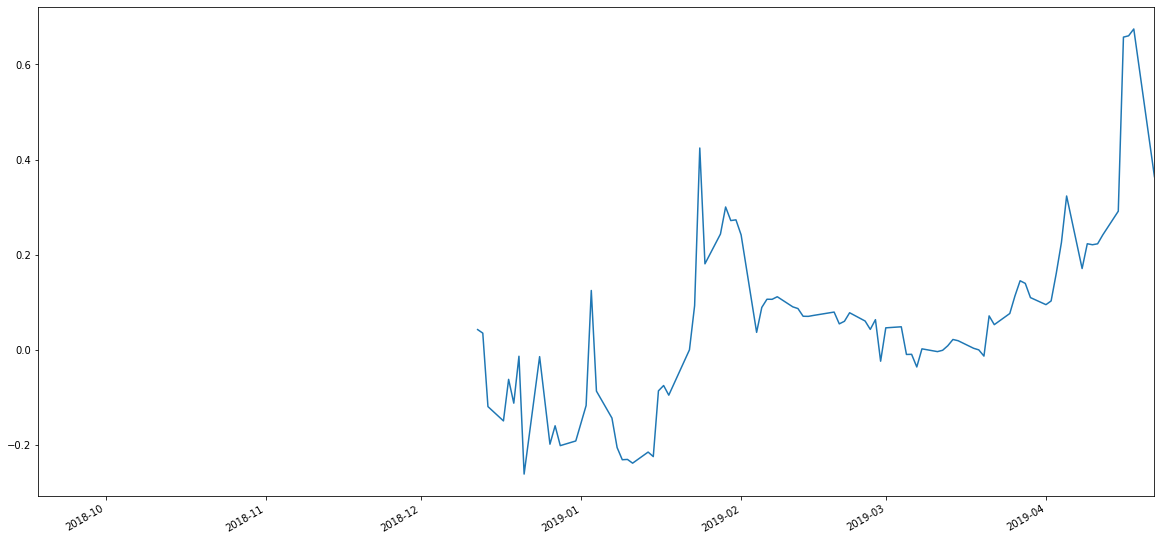

In [144]:
# Beta
# YOUR CODE HERE
rolling_covariance_newfolio = new_portfolio_df['Custom'].rolling(window=21).cov(new_portfolio_df['S&P 500'])
rolling_variance_newfolio= new_portfolio_df['S&P 500'].rolling(window=60).var()
rolling_beta_newfolio = rolling_covariance_newfolio/rolling_variance_newfolio
rolling_beta_newfolio.plot(figsize = [20,10])

In [145]:
# Annualzied Sharpe Ratios
# YOUR CODE HERE
sharpe_ratios_newfolio = (new_portfolio_df.mean() * 252) / (new_portfolio_df.std() * np.sqrt(252))
sharpe_ratios_newfolio

SOROS FUND MANAGEMENT LLC      0.275574
PAULSON & CO.INC.             -0.405110
TIGER GLOBAL MANAGEMENT LLC   -1.705584
BERKSHIRE HATHAWAY INC         0.675051
Algo 1                         2.616240
Algo 2                        -0.294508
S&P 500                       -0.003827
Custom                         0.701279
dtype: float64

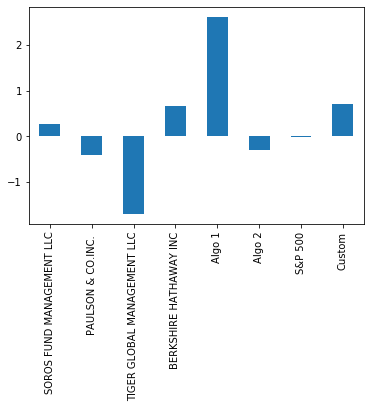

In [146]:
# Visualize the sharpe ratios as a bar plot
# YOUR CODE HERE
sharpe_ratios_newfolio.plot(kind='bar')

## Include correlation analysis to determine which stocks (if any) are correlated

In [147]:
# YOUR CODE HERE
new_portfolio_df.corr()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Custom
SOROS FUND MANAGEMENT LLC,1.000000,0.819003,0.485548,0.852603,0.388410,0.881609,-0.062092,0.753864
PAULSON & CO.INC.,0.819003,1.000000,0.477260,0.702818,0.434360,0.826431,-0.080302,0.641573
TIGER GLOBAL MANAGEMENT LLC,0.485548,0.477260,1.000000,0.346511,0.162959,0.402032,-0.009753,0.281323
BERKSHIRE HATHAWAY INC,0.852603,0.702818,0.346511,1.000000,0.396169,0.821857,-0.053382,0.822235
Algo 1,0.388410,0.434360,0.162959,0.396169,1.000000,0.437788,-0.060515,0.286384
Algo 2,0.881609,0.826431,0.402032,0.821857,0.437788,1.000000,-0.081066,0.760713
S&P 500,-0.062092,-0.080302,-0.009753,-0.053382,-0.060515,-0.081066,1.000000,-0.007320
Custom,0.753864,0.641573,0.281323,0.822235,0.286384,0.760713,-0.007320,1.000000


## How does your portfolio fair?
### Custom Portfolio: Performance and Risk Analysis
The new custom portfolio includes Amazon, Intuit and Qualcom stocks.

#### ***Does the custom portfolio's return outperform the S&P 500?***
The cumulative returns chart with the addition of the new custom portfolio does not suggest that the new custom portfolio outperform the S&P 500. Only in mid-April 2019 did it beat the market.

#### ***Is the custom portfolio riskier than the S&P 500?***
The new custom portfolio is riskier than the S&P 500 as suggested by the standard deviation (S&P 500 of 0.011464 < Custom of 0.019528)

#### ***Does risk increase for the custom portfolio at the same time risk increases in the S&P?***
The 21-day rolling standard deviation chart suggests the custom portfolio risk generally increase at the same time risk increases in the S&P500. Although in mid-April 2019, we see an opposite direction of movement.

#### ***Does the return mimic the S&P?***
Looking at the cumulative returns, the new portfolio goes the opposite direction of the S&P - it gains when the S&P loses. The negative correlation further validates this.

#### ***Does the portfolio seem sensitive to movements in the S&P 500?***
The 60-day rolling beta shows an interesting trend. While the correlation suggests the new portfolio does not mimic the market, the chart shows a positive relationship from Feb 2019 to April 2019.

#### ***Determine whether the new portfolio  outperform both the market (S&P 500) and the whales portfolios***
The annualized sharpe ratio of the custom portfolio (0.701279) outperformed the S&P 500 (-0.003827) and all of Whale portfolios (ranging from -1.705584 to 0.675051).
